In [132]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [133]:
import numpy 
import pandas
import json
from os import path, listdir
import itertools
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [146]:
def get_freq_comments(l):
    with open(l,'r') as l_data:
        lines = l_data.readlines()
    cont_comments = [ l.split('\t')[2].split() for l in lines]
    c = Counter(itertools.chain(*cont_comments))
    return c.most_common()

def get_comments(l):
    with open(l,'r') as l_data:
        lines = l_data.readlines()
    return [ l.split('\t')[2].split() for l in lines]
    

def get_ratio_comment_code(l):
    with open(l,'r') as l_data:
        lines = l_data.readlines()
    #return [  (l.split('\t')[2].split() , l.split('\t')[3].split()) for l in lines]   
    #return  [ 1.0 * len(l.split('\t')[2].split()) / len(l.split('\t')[3].split())  for l in lines]
    return  [  len(l.split('\t')[2].split()) -  len(l.split('\t')[3].split())  for l in lines]

('to', 25737) ('to', 3252) ('to', 3153)
('a', 22609) ('a', 2900) ('a', 2870)
('in', 18080) ('in', 2269) ('in', 2184)
('How', 14623) ('How', 1828) ('How', 1777)
('from', 8687) ('of', 1089) ('from', 1085)
('of', 8515) ('from', 1051) ('of', 1070)
('the', 7331) ('the', 880) ('the', 915)
('with', 6700) ('C#', 861) ('C#', 883)
('C#', 6658) ('with', 852) ('with', 882)
('I', 3934) ('I', 484) ('I', 508)


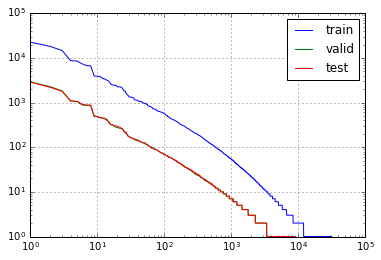

----


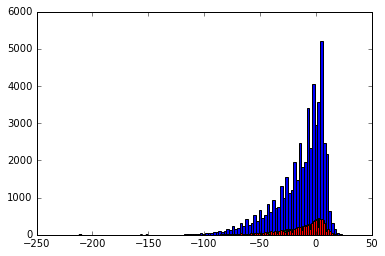

----
('in', 8397) ('in', 1040) ('in', 1090)
('to', 7873) ('to', 983) ('to', 1015)
('a', 7069) ('a', 920) ('a', 888)
('sql', 6389) ('sql', 837) ('sql', 857)
('mysql', 5679) ('mysql', 715) ('mysql', 731)
('how', 5016) ('how', 645) ('how', 665)
('of', 4568) ('the', 568) ('query', 608)
('query', 4467) ('query', 564) ('from', 587)
('the', 4430) ('of', 557) ('the', 570)
('from', 4369) ('from', 543) ('of', 520)


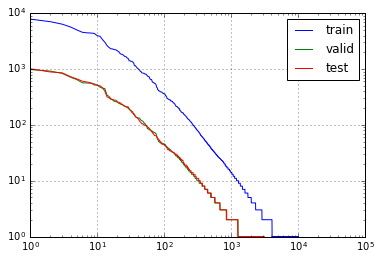

----


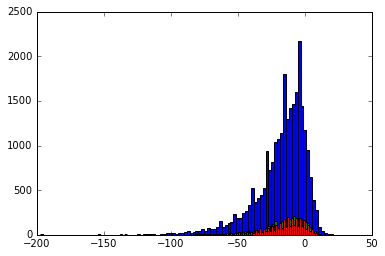

In [145]:
# lets begin by analizing la data de los greeks

#csharp
train = '/home/ubuntu/codenn/data/stackoverflow/csharp/train.txt' 
valid = '/home/ubuntu/codenn/data/stackoverflow/csharp/valid.txt'
test  = '/home/ubuntu/codenn/data/stackoverflow/csharp/test.txt'

f_train = get_freq_comments(train)
f_valid = get_freq_comments(valid)
f_test  = get_freq_comments(test)

for i in range(10):
    print f_train[i], f_valid[i], f_test[i]
    
    
plt.loglog([c[1] for c in f_train ], label='train')
plt.loglog([c[1] for c in f_valid ], label='valid')
plt.loglog([c[1] for c in f_test ], label='test')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


print '----'

plt.hist(get_ratio_comment_code(train), 100)
plt.hist(get_ratio_comment_code(valid),100)
plt.hist(get_ratio_comment_code(test),100)
plt.show()

print '----'


#sql

train_sql = '/home/ubuntu/codenn/data/stackoverflow/sql/train.txt' 
valid_sql = '/home/ubuntu/codenn/data/stackoverflow/sql/valid.txt'
test_sql  = '/home/ubuntu/codenn/data/stackoverflow/sql/test.txt'

f_train_sql = get_freq_comments(train_sql)
f_valid_sql = get_freq_comments(valid_sql)
f_test_sql  = get_freq_comments(test_sql)

for i in range(10):
    print f_train_sql[i], f_valid_sql[i], f_test_sql[i]

    
plt.loglog([c[1] for c in f_train_sql ], label='train')
plt.loglog([c[1] for c in f_valid_sql ], label='valid')
plt.loglog([c[1] for c in f_test_sql ], label='test')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

print '----'


plt.hist(get_ratio_comment_code(train_sql), 100)
plt.hist(get_ratio_comment_code(valid_sql),100)
plt.hist(get_ratio_comment_code(test_sql),100)
plt.show()


In [151]:
train_comments = get_comments(train)
train_comments_length = [len(c) for c in train_comments]

print 'min' ,  min (train_comments_length)
print 'max' ,  max (train_comments_length)
print 'avg' ,  sum(train_comments_length) / float(len(train_comments_length))


min 2
max 31
avg 8.9429296372


In [135]:
data_path = '/home/ubuntu/data/theano_commits/'

In [136]:
def tokenize_nlp(text):
    return text.split()

In [137]:
json_path  = path.join(data_path, "json")
json_files = listdir(json_path)

data_dict = {}
for filename in json_files:
    sha = filename.replace('.json','')
    filepath = path.join(json_path, filename)
    with open(filepath, 'r') as json_file:
        json_data = json.load(json_file)
    data_dict[sha] = json_data

In [163]:
tokenized_comments = [ tokenize_nlp(commit['commit']['message']) for sha, commit in data_dict.items() ]
print 'total ', len(tokenized_comments)


total  24200


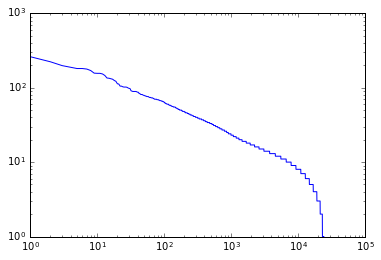

In [139]:
plt.loglog(sorted([len(c) for c  in tokenized_comments],reverse= True))
plt.show()

In [152]:
tokenized_comments_length = [len(c) for c in tokenized_comments]

print 'min' ,  min (tokenized_comments_length)
print 'max' ,  max (tokenized_comments_length)
print 'avg' ,  sum(tokenized_comments_length) / float(len(tokenized_comments_length))

min 1
max 452
avg 8.86739669421


In [162]:
comments_length_one = [ c for c in tokenized_comments if len(c) ==1 ] 
print len(comments_length_one)

1188


In [165]:
comments_length_max = [ c for c in tokenized_comments if len(c) > 30 ]
print len(comments_length_max)

586


In [167]:
c = Counter(itertools.chain(*tokenized_comments))

In [168]:
len(c.most_common())

26099

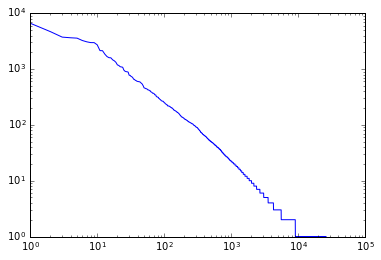

In [169]:
plt.loglog([cc[1] for  cc in c.most_common()] )
plt.show()

In [170]:
# lets remove some stuff
comments_subset = [ c for c  in tokenized_comments if len (c) >1 and len(c) <=  30]

In [172]:
comments_subset[:10]

[[u'tweaks', u'to', u'pydotprint', u'for', u'paper'],
 [u'Added', u'a', u'line', u'in', u'NEWS.txt.'],
 [u'Update', u'and', u'standardize', u'error', u'messages'],
 [u'Skip', u'dnn', u'test', u'if', u'it', u"isn't", u'avail'],
 [u'Use', u'getpreferredencoding()', u'to', u'detect', u'encoding'],
 [u'added',
  u'set_instead_of_inc',
  u'to',
  u'AdvSubtensor1,',
  u'and',
  u'fixed',
  u'bug',
  u'in',
  u'eq',
  u'and',
  u'hash'],
 [u'New', u'user-friendly', u'function', u'to', u'compare', u'variables'],
 [u'made',
  u'the',
  u'failure_callback',
  u'for',
  u'the',
  u'optdb',
  u'display',
  u'errors'],
 [u'added', u'scalar.composite'],
 [u'Use',
  u'OrderedDict',
  u'in',
  u'scan',
  u'op',
  u'to',
  u'try',
  u'to',
  u'fix',
  u'schochastic',
  u'opt',
  u'order',
  u'problem.']]

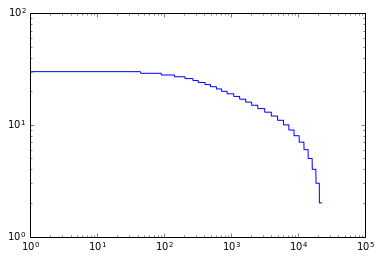

In [173]:
plt.loglog(sorted([len(c) for c  in comments_subset],reverse= True))
plt.show()

In [174]:
comments_subset_length = [len(c) for c in comments_subset]

print 'min' ,  min (comments_subset_length)
print 'max' ,  max (comments_subset_length)
print 'avg' ,  sum(comments_subset_length) / float(len(comments_subset_length))

min 2
max 30
avg 8.19637920271


In [175]:
print 'total',  len (comments_subset)

total 22426


In [176]:
diffs_path = path.join(data_path, "diffs")
diff_files = listdir(diffs_path)

In [177]:
len(diff_files)

24200